### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

# My GitHub repository.
https://github.com/jenashubo/LSE_DA_NHS_Analysis

# 

# Assignment activity 2

### Prepare your workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
ad.shape
ad.dtypes
# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [4]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [5]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')
ar.shape
ar.dtypes
# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [8]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [9]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [11]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')
nc.shape
nc.dtypes
# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [12]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [13]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [14]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [15]:
# Determine the number of locations.
print("There are " + str(nc.sub_icb_location_name.nunique()) + " unique locations in this dataset")

There are 106 unique locations in this dataset


**Question 2:** What are the five locations with the highest number of records?



In [16]:
# Determine the top five locations based on record count.
nc.sub_icb_location_name.value_counts()
print("The five locations with the highest"
      " number of records are:"
      " \nNorth West London \nKent and Medway \nDevon "
      "\nHampshire and Isle of Wight \nNorth East London")

The five locations with the highest number of records are: 
North West London 
Kent and Medway 
Devon 
Hampshire and Isle of Wight 
North East London


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
print("There are " + str(nc.service_setting.nunique()) + " unique service settings in this dataset")

There are 5 unique service settings in this dataset


In [18]:
# Determine the number of context types.
print("There are " + str(nc.context_type.nunique()) + " unique context types in this dataset")

There are 3 unique context types in this dataset


In [19]:
# Determine the number of national categories.
print("There are " + str(nc.national_category.nunique()) + " unique national categories in this dataset")

There are 18 unique national categories in this dataset


In [20]:
# Determine the number of appointment status.
print("There are " + str(ar.appointment_status.nunique()) + " unique appointment statuses in this dataset")

There are 3 unique appointment statuses in this dataset


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.appointment_date.head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.appointment_date.head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [23]:
# Change the date format of ad['appointment_date'].
ad.appointment_date = pd.to_datetime(ad.appointment_date)
ad.appointment_date.dtypes
# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [24]:
# Change the date format of nc['appointment_date'].
nc.appointment_date = pd.to_datetime(nc.appointment_date)
nc.appointment_date.dtypes
# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [25]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad.appointment_date.min()

Timestamp('2021-12-01 00:00:00')

In [26]:
ad.appointment_date.max()

Timestamp('2022-06-30 00:00:00')

In [27]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc.appointment_date.min()

Timestamp('2021-08-01 00:00:00')

In [28]:
nc.appointment_date.max()

Timestamp('2022-06-30 00:00:00')

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [29]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc[(nc.appointment_date.between('2022-01-01', '2022-06-01')) 
               & (nc["sub_icb_location_name"] == 'NHS North West London ICB - W2U3Z')]

# View the output.
nc_subset.service_setting.value_counts()

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [30]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc.groupby([nc['appointment_date'].dt.year, 
            nc['appointment_date'].dt.month])['count_of_appointments'].sum().sort_values()

appointment_date  appointment_date
2021              8                   23852171
2022              4                   23913060
2021              12                  25140776
2022              2                   25355260
                  1                   25635474
                  6                   25828078
                  5                   27495508
2021              9                   28522501
2022              3                   29595038
2021              10                  30303834
                  11                  30405070
Name: count_of_appointments, dtype: int64

In [31]:
print("November in 2021 has the most appointments with 30405070")

November in 2021 has the most appointments with 30405070


**Question 4:** What was the total number of records per month?

In [32]:
# Total number of records per month.
nc.groupby([nc['appointment_date'].dt.year, 
            nc['appointment_date'].dt.month])['count_of_appointments'].count()

appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
Name: count_of_appointments, dtype: int64

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [33]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [34]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

In [35]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc[["appointment_month", "service_setting", "count_of_appointments"]]
nc_ss = nc_ss.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index(name = 'total_count')

# View output.
nc_ss

,appointment_month,service_setting,total_count
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

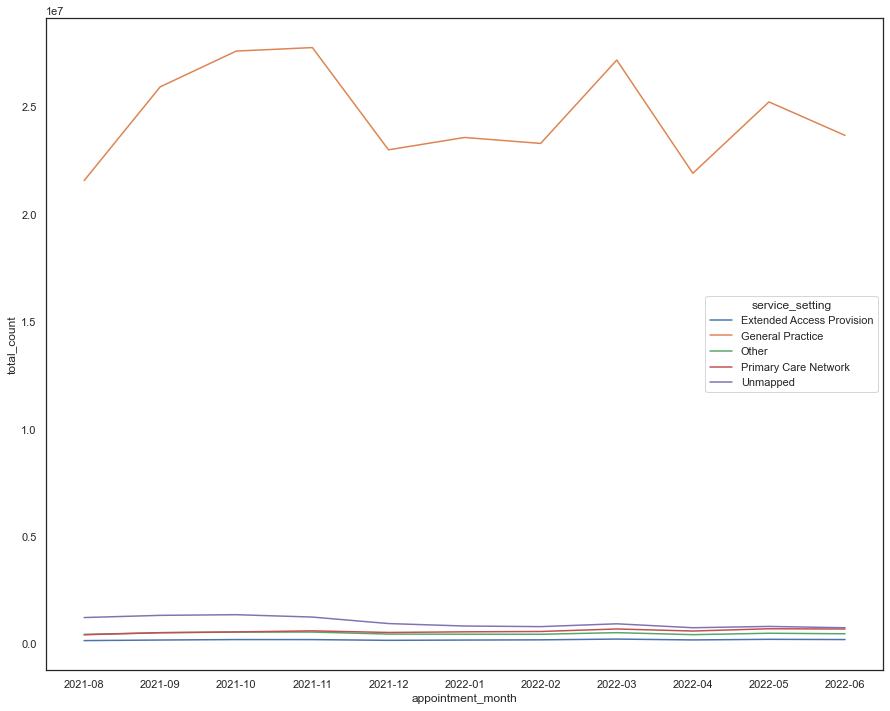

In [36]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_ss[nc_ss['service_setting'].isin(['General Practice', 'Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])],
             hue = 'service_setting', ci=None)

<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

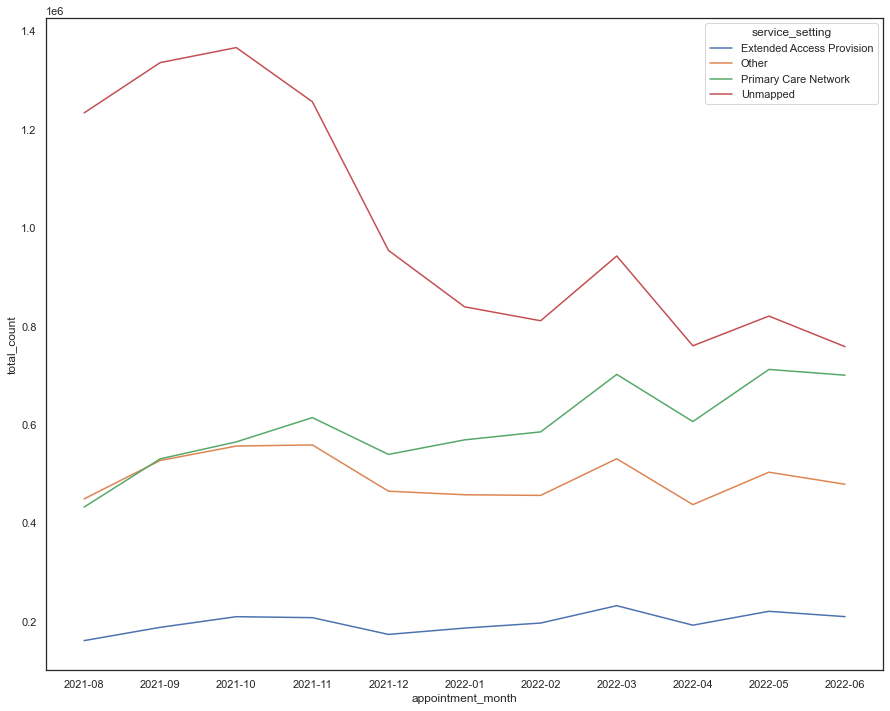

In [37]:
# Create a visualisation excluding 'General Practice' to make other lines more visible
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_ss[nc_ss['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])],
             hue = 'service_setting', ci=None)

**Context types:**

In [38]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc[["appointment_month", "context_type", "count_of_appointments"]]
nc_ct = nc_ct.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index(name = 'total_count')

# View output.
nc_ct

,appointment_month,context_type,total_count
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

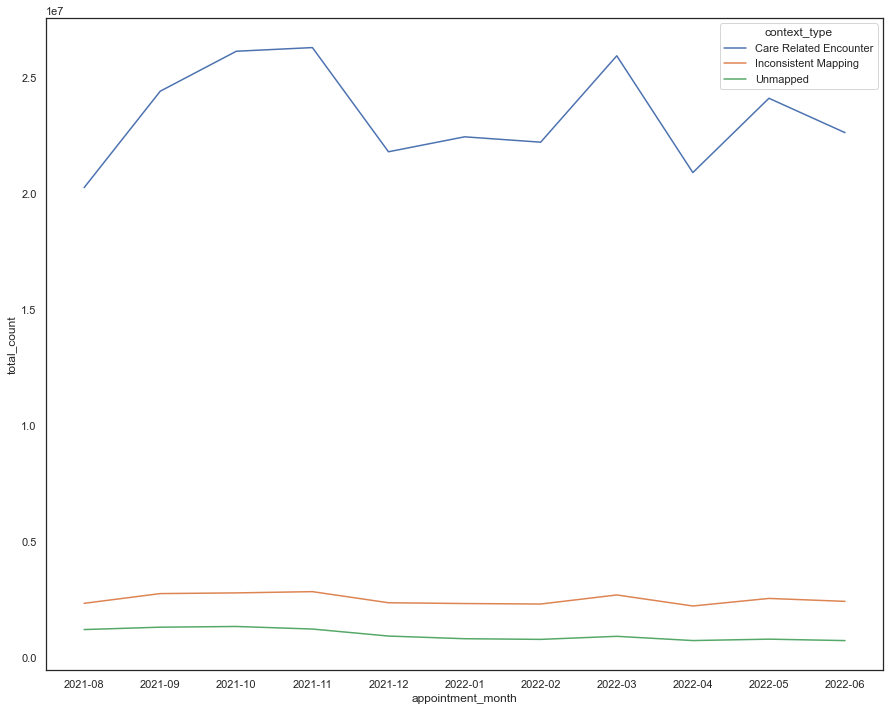

In [39]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_ct[nc_ct['context_type'].isin(['Unmapped', 'Care Related Encounter', 'Inconsistent Mapping'])],
             hue = 'context_type', ci=None)

<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

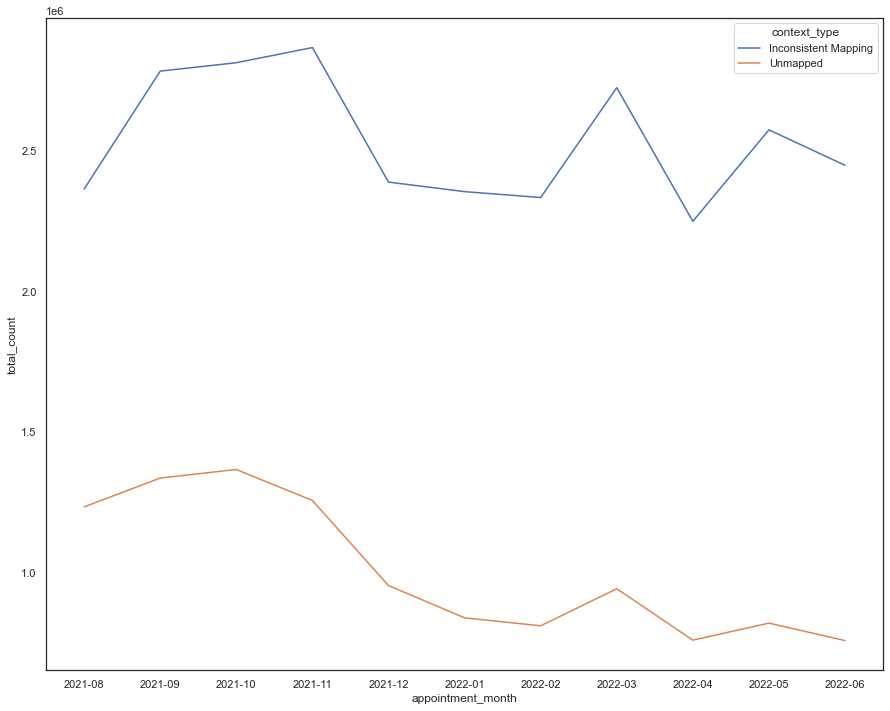

In [40]:
# Excluding 'Care Related Encounter'
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_ct[nc_ct['context_type'].isin(['Unmapped', 'Inconsistent Mapping'])],
             hue = 'context_type', ci=None)

**National categories:**

In [41]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc[["appointment_month", "national_category", "count_of_appointments"]]
nc_nc = nc_nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index(name = 'total_count')

# View output.
nc_nc

,appointment_month,national_category,total_count
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

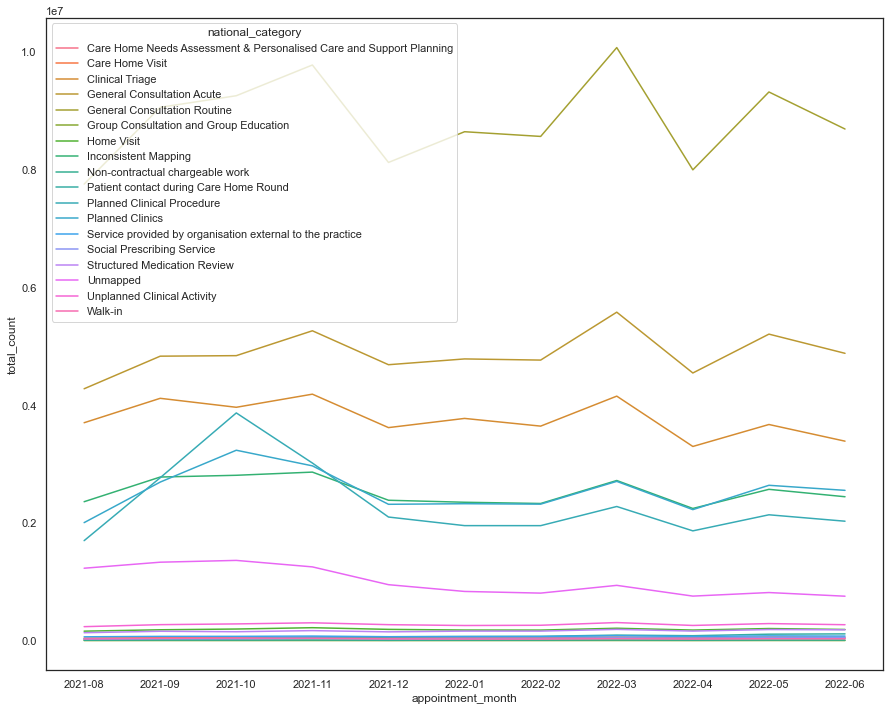

In [42]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_nc[nc_nc['national_category'].isin(['Inconsistent Mapping', 'General Consultation Routine', 
                                                           'General Consultation Acute', 'Planned Clinics', 
                                                           'Clinical Triage', 'Planned Clinical Procedure', 
                                                           'Structured Medication Review', 
                                                           'Service provided by organisation external to the practice', 
                                                           'Home Visit', 'Unplanned Clinical Activity', 
                                                           'Patient contact during Care Home Round', 'Unmapped', 
                                                           'Care Home Visit', 'Social Prescribing Service', 
                                                           'Care Home Needs Assessment & Personalised Care and Support Planning',
                                                           'Non-contractual chargeable work', 'Walk-in', 
                                                           'Group Consultation and Group Education'])],
             hue = 'national_category', ci=None)

<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

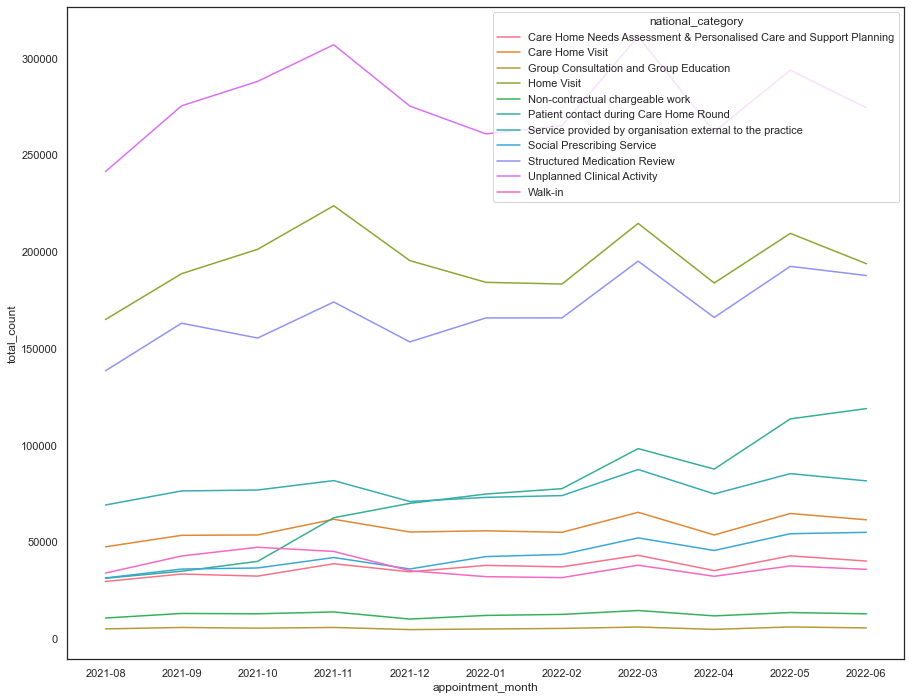

In [43]:
# With less categories
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = nc_nc[nc_nc['national_category'].isin(['Structured Medication Review', 
                                                           'Service provided by organisation external to the practice', 
                                                           'Home Visit', 'Unplanned Clinical Activity', 
                                                           'Patient contact during Care Home Round', 
                                                           'Care Home Visit', 'Social Prescribing Service', 
                                                           'Care Home Needs Assessment & Personalised Care and Support Planning', 
                                                           'Non-contractual chargeable work', 'Walk-in', 
                                                           'Group Consultation and Group Education'])],
             hue = 'national_category', ci=None)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [44]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc[["appointment_date", "service_setting", "appointment_month", "count_of_appointments"]]
nc_ss_day = nc_ss_day.groupby(['appointment_date', 'service_setting', 'appointment_month'
                              ])['count_of_appointments'].sum().reset_index(name = 'total_count')
nc_ss_day['appointment_date'] = nc_ss_day['appointment_date'].dt.strftime('%Y-%m-%d')

# View output.
nc_ss_day

,appointment_date,service_setting,appointment_month,total_count
0,2021-08-01,Extended Access Provision,2021-08,438
1,2021-08-01,General Practice,2021-08,3411
2,2021-08-01,Other,2021-08,401
3,2021-08-01,Primary Care Network,2021-08,323
4,2021-08-01,Unmapped,2021-08,1054
...,...,...,...,...
1665,2022-06-30,Extended Access Provision,2022-06,9163
1666,2022-06-30,General Practice,2022-06,1124374
1667,2022-06-30,Other,2022-06,23115
1668,2022-06-30,Primary Care Network,2022-06,34774


In [45]:
# Look at August 2021 in more detail to allow a closer look.
nc_ss_day_aug = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-08')]
nc_ss_day_aug

,appointment_date,service_setting,appointment_month,total_count
0,2021-08-01,Extended Access Provision,2021-08,438
1,2021-08-01,General Practice,2021-08,3411
2,2021-08-01,Other,2021-08,401
3,2021-08-01,Primary Care Network,2021-08,323
4,2021-08-01,Unmapped,2021-08,1054
...,...,...,...,...
150,2021-08-31,Extended Access Provision,2021-08,8281
151,2021-08-31,General Practice,2021-08,1125584
152,2021-08-31,Other,2021-08,23181
153,2021-08-31,Primary Care Network,2021-08,21789


[Text(0.5, 1.0, 'Service setting appointments in Summer')]

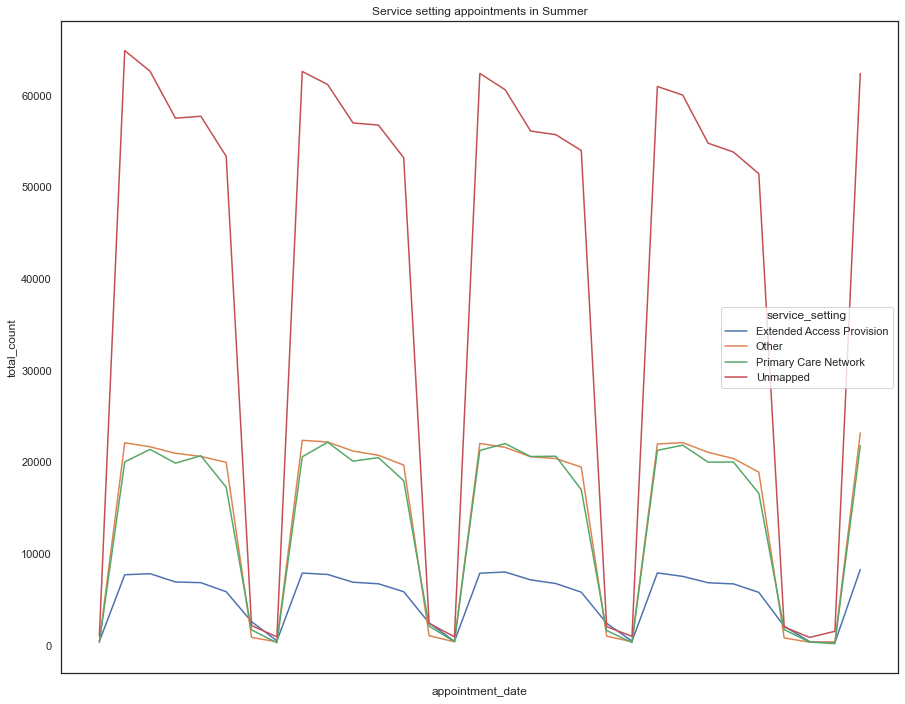

In [46]:
# Create a lineplot.
aug_graph = sns.lineplot(x = 'appointment_date', y = 'total_count', 
                         data = nc_ss_day_aug[nc_ss_day_aug['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])], 
                         hue = 'service_setting', ci=None)
aug_graph.set(xticklabels=[])
aug_graph.set(title='Service setting appointments in Summer')

**Autumn (October 2021):**

In [47]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_day_oct = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-10')]
nc_ss_day_oct

,appointment_date,service_setting,appointment_month,total_count
305,2021-10-01,Extended Access Provision,2021-10,7107
306,2021-10-01,General Practice,2021-10,1130646
307,2021-10-01,Other,2021-10,22639
308,2021-10-01,Primary Care Network,2021-10,22974
309,2021-10-01,Unmapped,2021-10,56201
...,...,...,...,...
455,2021-10-31,Extended Access Provision,2021-10,1113
456,2021-10-31,General Practice,2021-10,17449
457,2021-10-31,Other,2021-10,1147
458,2021-10-31,Primary Care Network,2021-10,1200


[Text(0.5, 1.0, 'Service setting appointments in Autumn')]

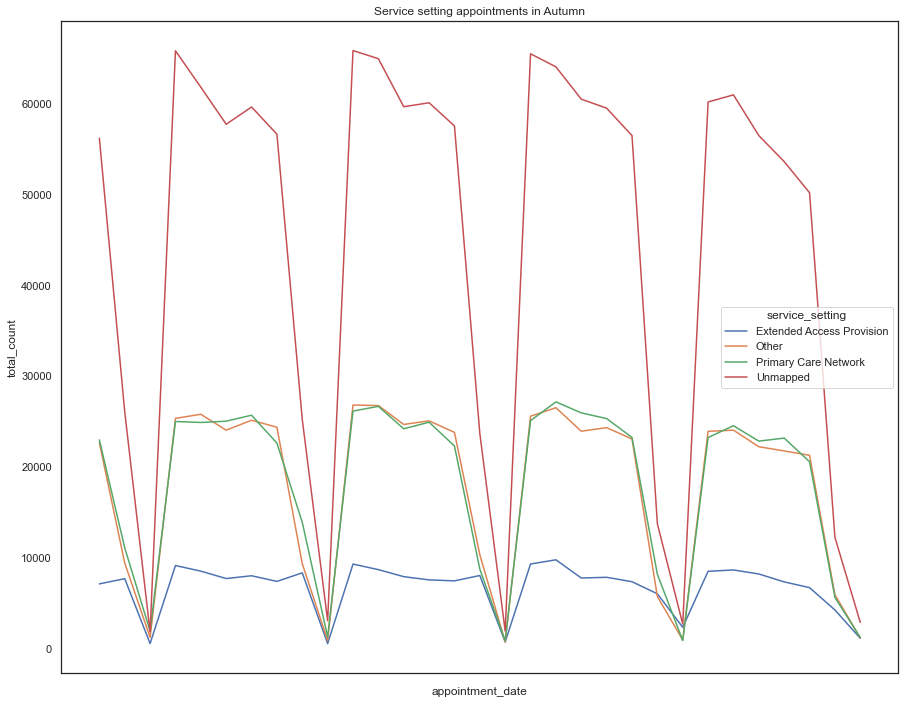

In [48]:
# Create a lineplot.
oct_graph = sns.lineplot(x = 'appointment_date', y = 'total_count', 
                         data = nc_ss_day_oct[nc_ss_day_oct['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])], 
                         hue = 'service_setting', ci=None)
oct_graph.set(xticklabels=[])
oct_graph.set(title='Service setting appointments in Autumn')

**Winter (January 2022):**

In [49]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_day_jan = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-01')]
nc_ss_day_jan

,appointment_date,service_setting,appointment_month,total_count
765,2022-01-01,Extended Access Provision,2022-01,246
766,2022-01-01,General Practice,2022-01,3578
767,2022-01-01,Other,2022-01,280
768,2022-01-01,Primary Care Network,2022-01,215
769,2022-01-01,Unmapped,2022-01,572
...,...,...,...,...
915,2022-01-31,Extended Access Provision,2022-01,9962
916,2022-01-31,General Practice,2022-01,1305082
917,2022-01-31,Other,2022-01,25034
918,2022-01-31,Primary Care Network,2022-01,30509


[Text(0.5, 1.0, 'Service setting appointments in Winter')]

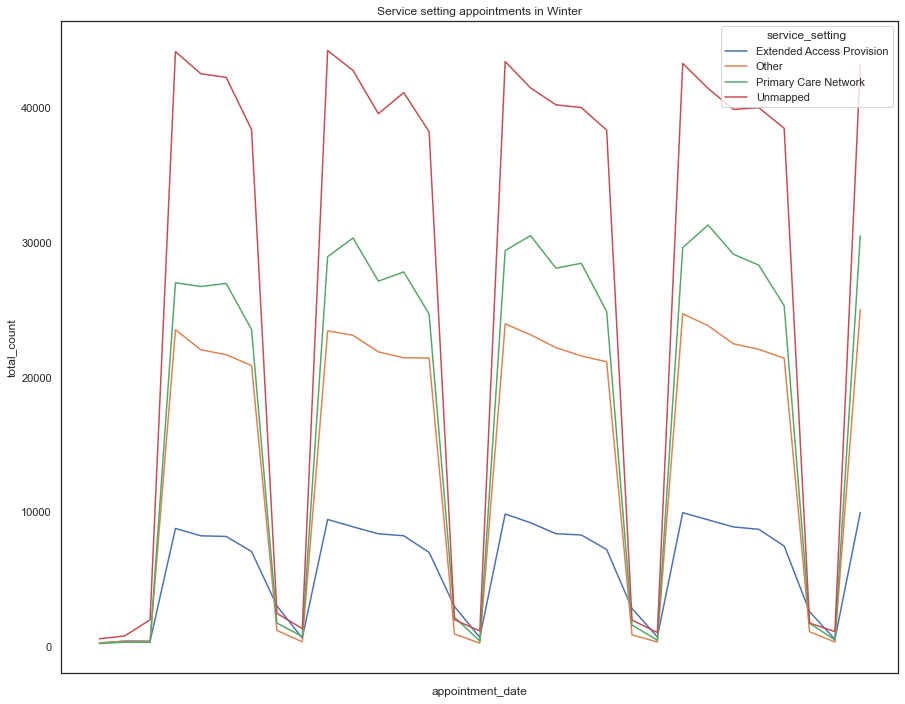

In [50]:
# Create a lineplot.
jan_graph = sns.lineplot(x = 'appointment_date', y = 'total_count', 
                         data = nc_ss_day_jan[nc_ss_day_jan['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])], 
                         hue = 'service_setting', ci=None)
jan_graph.set(xticklabels=[])
jan_graph.set(title='Service setting appointments in Winter')

**Spring (April 2022):**

In [51]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_day_apr = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-04')]
nc_ss_day_apr

,appointment_date,service_setting,appointment_month,total_count
1215,2022-04-01,Extended Access Provision,2022-04,8011
1216,2022-04-01,General Practice,2022-04,1085037
1217,2022-04-01,Other,2022-04,21077
1218,2022-04-01,Primary Care Network,2022-04,26493
1219,2022-04-01,Unmapped,2022-04,36836
...,...,...,...,...
1360,2022-04-30,Extended Access Provision,2022-04,3416
1361,2022-04-30,General Practice,2022-04,23675
1362,2022-04-30,Other,2022-04,1148
1363,2022-04-30,Primary Care Network,2022-04,3150


[Text(0.5, 1.0, 'Service setting appointments in Spring')]

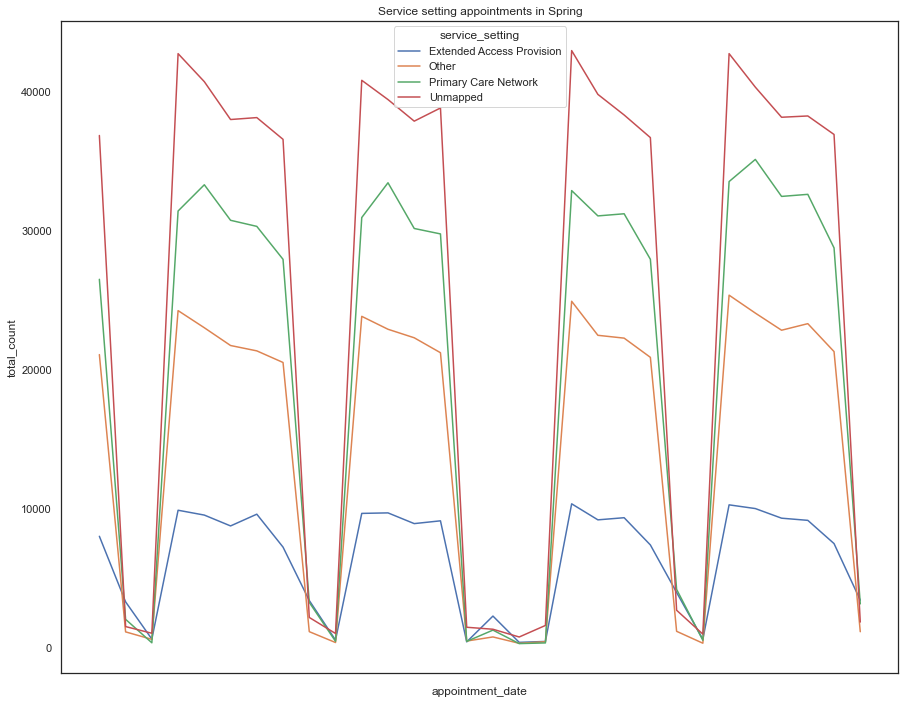

In [52]:
# Create a lineplot.
apr_graph = sns.lineplot(x = 'appointment_date', y = 'total_count', 
                         data = nc_ss_day_apr[nc_ss_day_apr['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])], 
                         hue = 'service_setting', ci=None)
apr_graph.set(xticklabels=[])
apr_graph.set(title='Service setting appointments in Spring')

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [53]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [54]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')
tweets.shape
tweets.dtypes

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [55]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [56]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [57]:
# Would it be useful to only look at retweeted and favourite tweet messages?
tweets.tweet_retweet_count.value_counts()
tweets.tweet_favorite_count.value_counts()
# Explain your answer.
print('It would be useful to take a look at the highest retweeted tweets and favorites to see what specifically stood out and if \nthere are particular words that made it so popular')

It would be useful to take a look at the highest retweeted tweets and favorites to see what specifically stood out and if 
there are particular words that made it so popular


In [58]:
# Create a new DataFrame containing only the text.
tweet_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweet_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [59]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

In [60]:
# Display the first 30 records.
tags[0:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [61]:
# Convert the series to a DataFrame in preparation for visualisation.
panda_tags = pd.Series(tags)

# Rename the columns.
data = panda_tags.value_counts().reset_index(name = 'count')
data = data.rename(columns={'index': 'word'})

In [62]:
# Fix the count datatype.
# View the result.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [63]:
# Display records where the count is larger than 10.
data_over_10 = data[data["count"] > 10]
data_over_10

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#marketing,25


In [64]:
# Remove unneccesary hashtags before plotting
data_over_10 = data_over_10.drop([0,1,5,9,10,11,14,17])
data_over_10 = data_over_10.drop([20,21,23,24,25,26,28,30])
data_over_10 = data_over_10.drop([32,33,35,39,40,41,43,44])
data_over_10 = data_over_10.drop([6,27,46,13,15,29,19,45])
data_over_10

,word,count
2,#medicine,41
3,#ai,40
4,#job,38
7,#pharmaceutical,28
8,#digitalhealth,25
12,#competitiveintelligence,24
16,#hiring,18
18,#news,17
22,#covid,16
31,#healthcare.,13


[Text(0.5, 1.0, 'Most common hashtags')]

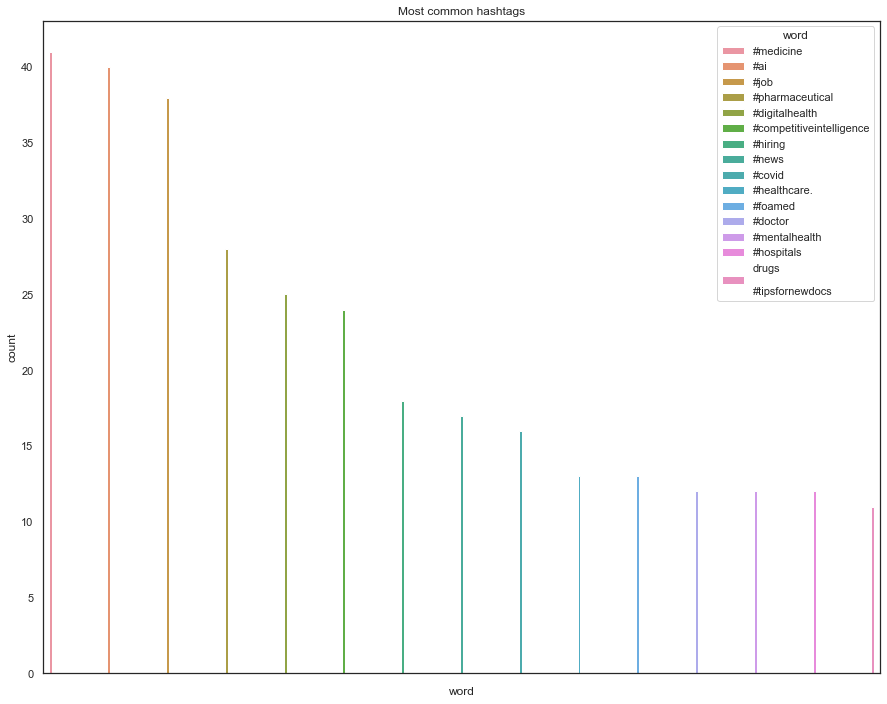

In [65]:
# Create a Seaborn barplot indicating records with a count >10 records.
common_hashtags = sns.barplot(x = 'word', y = 'count', hue = 'word', data = data_over_10)
common_hashtags.set(xticklabels=[])
common_hashtags.set(title='Most common hashtags')

# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [66]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [67]:
# Print the min and max dates.
ar.appointment_month.min()

'2020-01'

In [68]:
ar.appointment_month.max()

'2022-06'

In [69]:
# Filter the data set to only look at data from 2021-08 onwards.
ar = ar[(ar['appointment_month'] > '2021-08')]
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3850,E54000034,2021-09,Attended,GP,Face-to-Face,1 Day,8288
3851,E54000034,2021-09,Attended,GP,Face-to-Face,15 to 21 Days,3827
3852,E54000034,2021-09,Attended,GP,Face-to-Face,2 to 7 Days,13466
3853,E54000034,2021-09,Attended,GP,Face-to-Face,22 to 28 Days,1300
3854,E54000034,2021-09,Attended,GP,Face-to-Face,8 to 14 Days,6825
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [70]:
# Create an aggregated data set to review the different features.
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3850,2021-09,GP,Attended,Face-to-Face,1 Day,8288
3851,2021-09,GP,Attended,Face-to-Face,15 to 21 Days,3827
3852,2021-09,GP,Attended,Face-to-Face,2 to 7 Days,13466
3853,2021-09,GP,Attended,Face-to-Face,22 to 28 Days,1300
3854,2021-09,GP,Attended,Face-to-Face,8 to 14 Days,6825
...,...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [71]:
# Determine the total number of appointments per month.
ar_df = ar.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index(name = 'total_count')

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = (ar_df['total_count']/30).round(1)

# View the DataFrame.
ar_df

,appointment_month,total_count,utilisation
0,2021-09,28522501,950750.0
1,2021-10,30303834,1010127.8
2,2021-11,30405070,1013502.3
3,2021-12,25140776,838025.9
4,2022-01,25635474,854515.8
5,2022-02,25355260,845175.3
6,2022-03,29595038,986501.3
7,2022-04,23913060,797102.0
8,2022-05,27495508,916516.9
9,2022-06,25828078,860935.9


<AxesSubplot:xlabel='appointment_month', ylabel='total_count'>

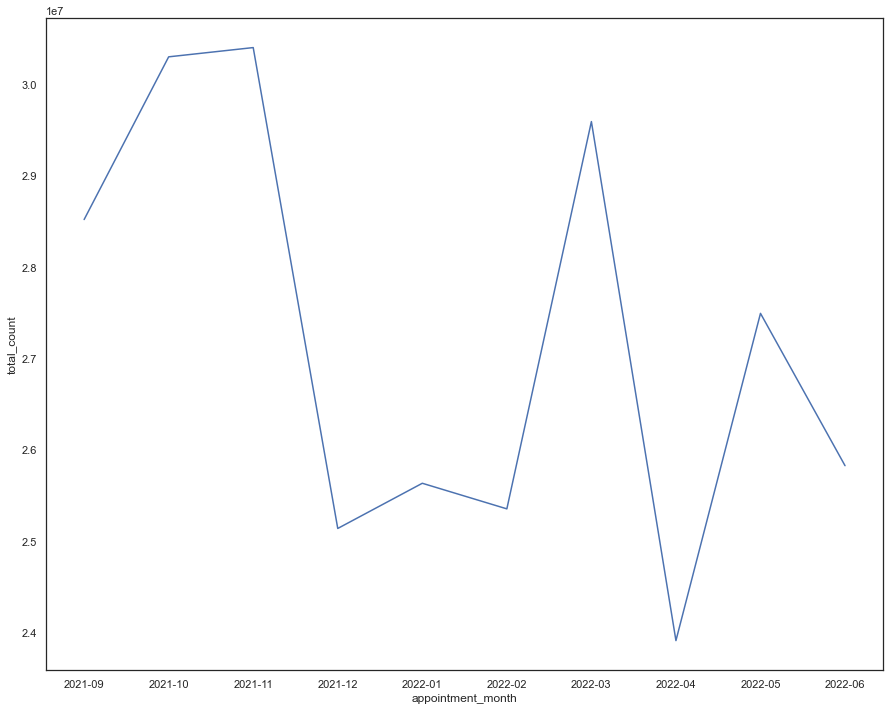

In [72]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
sns.lineplot(x = 'appointment_month', y = 'total_count',
             data = ar_df)

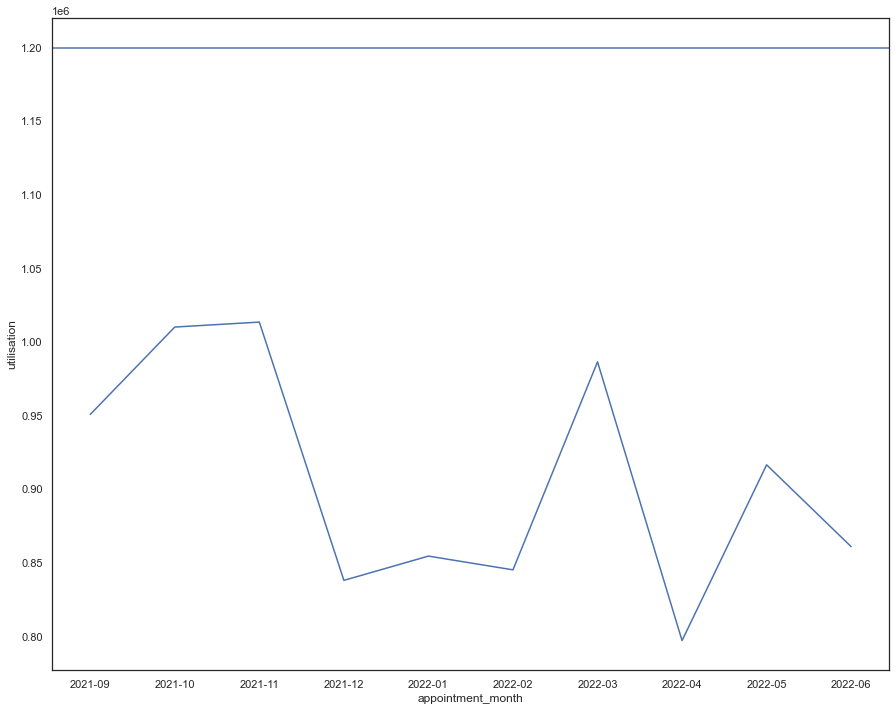

In [73]:
# Plot monthly capacity utilisation.
utilisation_graph = sns.lineplot(x = 'appointment_month', y = 'utilisation',
                                 data = ar_df)
# Create a second line with the max utilisation per month
utilisation_graph.axhline(1200000)

**Question 2:** How do the healthcare professional types differ over time?

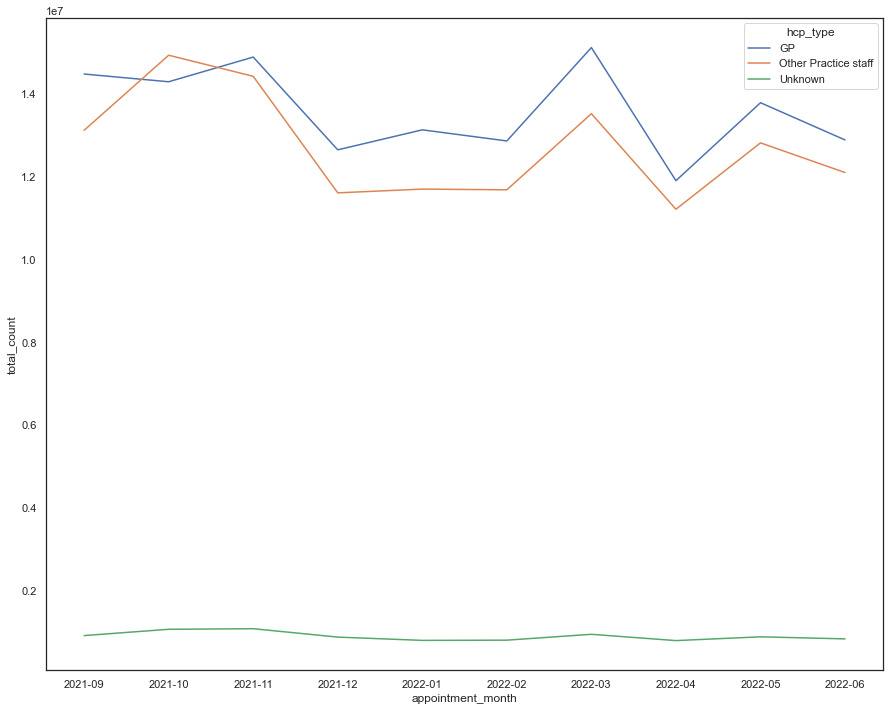

In [74]:
# Create a line plot to answer the question.
ar_hcp = ar_agg.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_hcp_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_hcp, 
                         hue = 'hcp_type', ci=None)

**Question 3:** Are there significant changes in whether or not visits are attended?

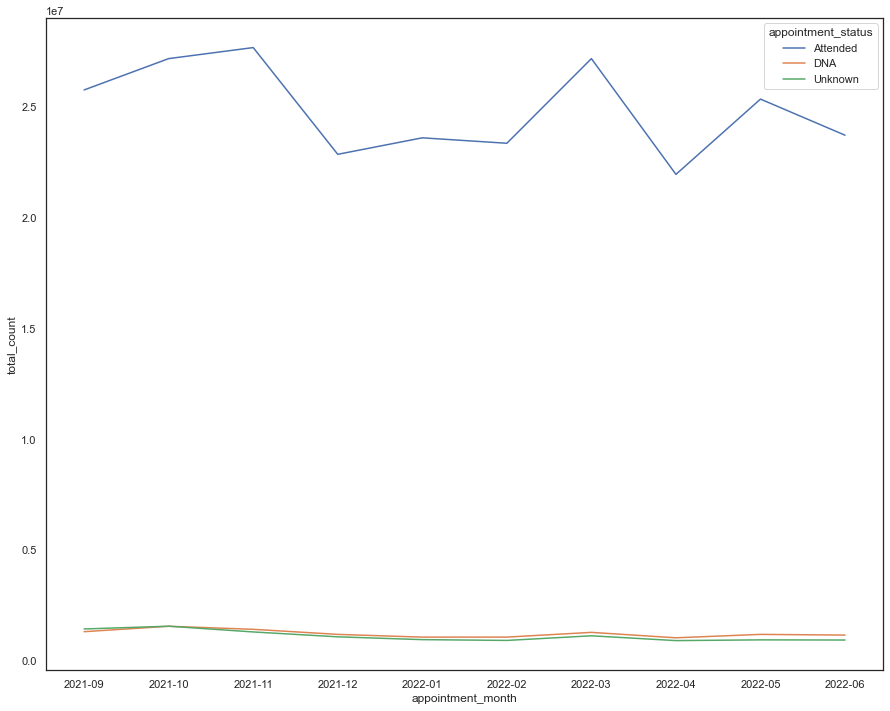

In [75]:
# Create a line plot to answer the question.
ar_status = ar_agg.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_status_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_status, 
                         hue = 'appointment_status', ci=None)

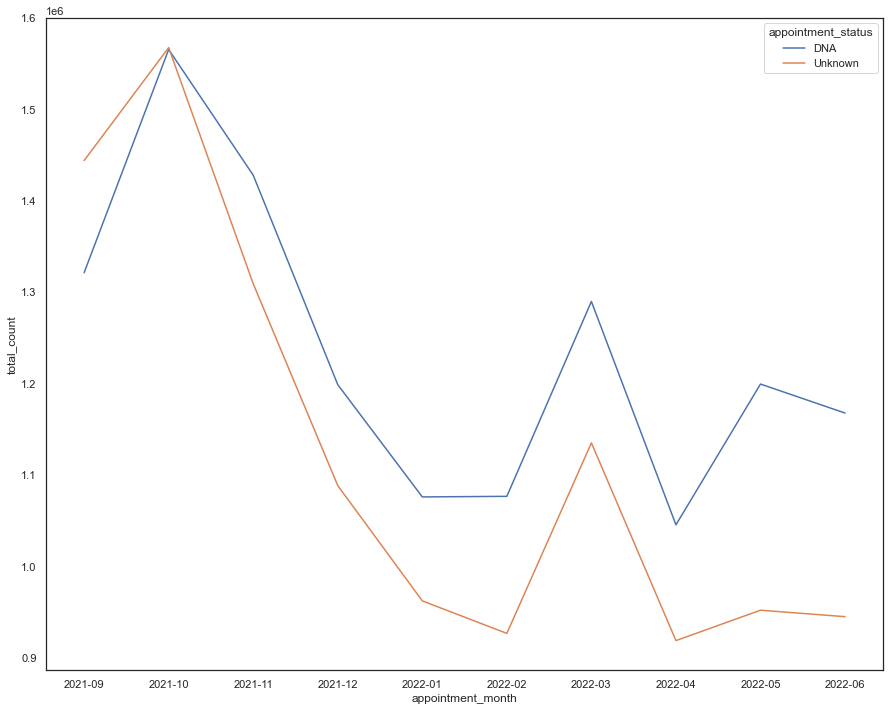

In [76]:
# Excluding 'Attended'
ar_status = ar_agg.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_status_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_status[ar_status['appointment_status'].isin(['DNA', 'Unknown'])], 
                         hue = 'appointment_status', ci=None)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

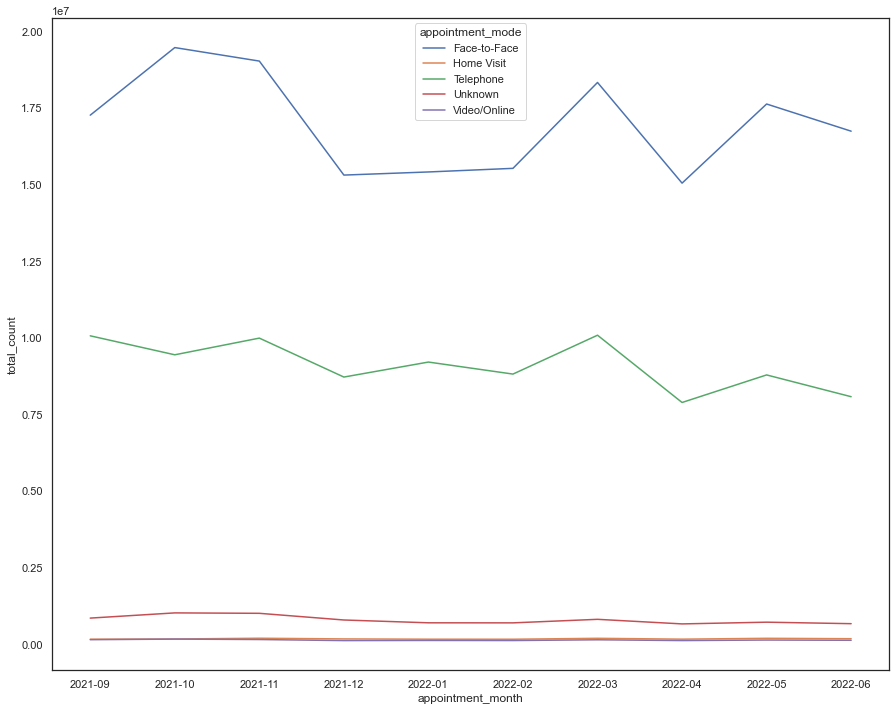

In [77]:
# Create a line plot to answer the question.
ar_mode = ar_agg.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_mode_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_mode, 
                         hue = 'appointment_mode', ci=None)

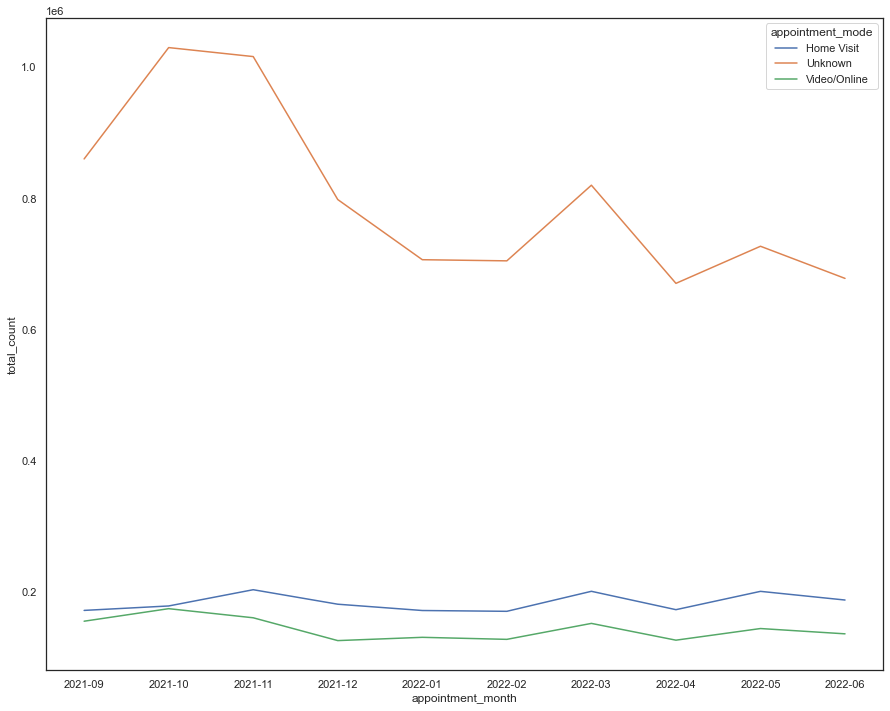

In [78]:
# Create a line plot to answer the question.
ar_mode = ar_agg.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_mode_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_mode[ar_mode['appointment_mode'].isin(['Home Visit', 'Unknown', 'Video/Online'])], 
                         hue = 'appointment_mode', ci=None)

**Question 5:** Are there any trends in time between booking an appointment?

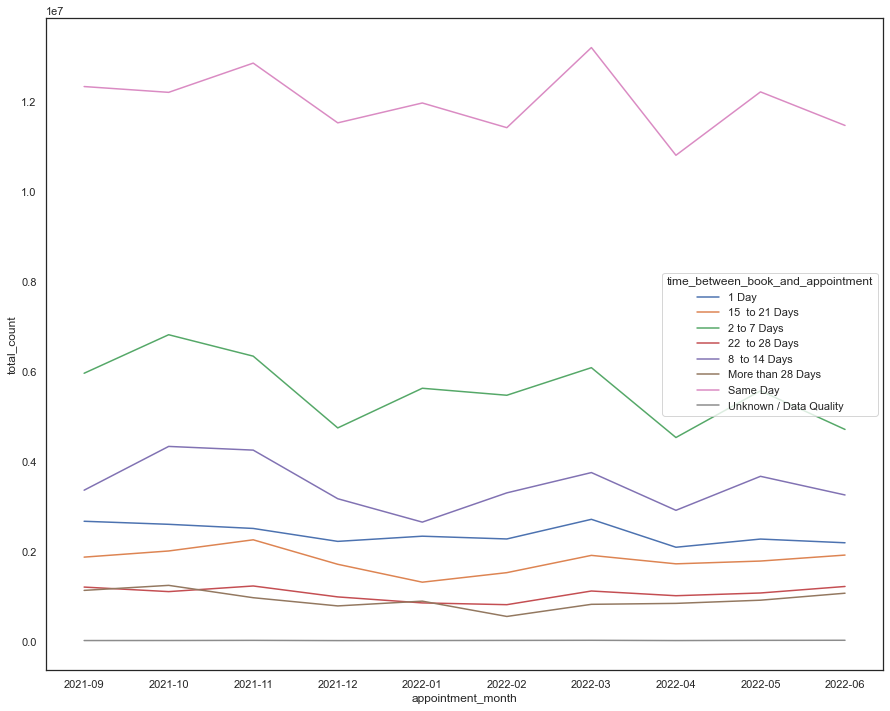

In [79]:
# Create a line plot to answer the question.
ar_time = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index(name = 'total_count')
ar_time_graph = sns.lineplot(x = 'appointment_month', y = 'total_count', 
                         data = ar_time, 
                         hue = 'time_between_book_and_appointment', ci=None)

**Question 6:** How do the spread of service settings compare?

In [80]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [81]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc_ss = nc[["appointment_month", "service_setting", "count_of_appointments"]]
nc_ss = nc_ss.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index(name = 'total_count')
# View the DataFrame.
nc_ss

,appointment_month,service_setting,total_count
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


<AxesSubplot:xlabel='service_setting', ylabel='total_count'>

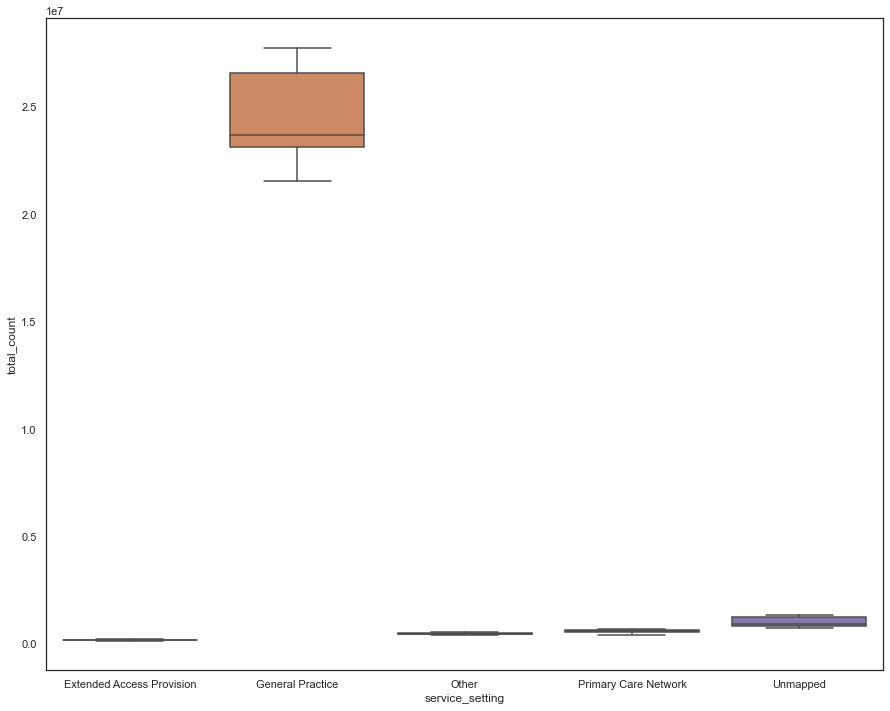

In [82]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(x = 'service_setting', y = 'total_count',
             data = nc_ss[nc_ss['service_setting'].isin(['General Practice', 'Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])])

<AxesSubplot:xlabel='service_setting', ylabel='total_count'>

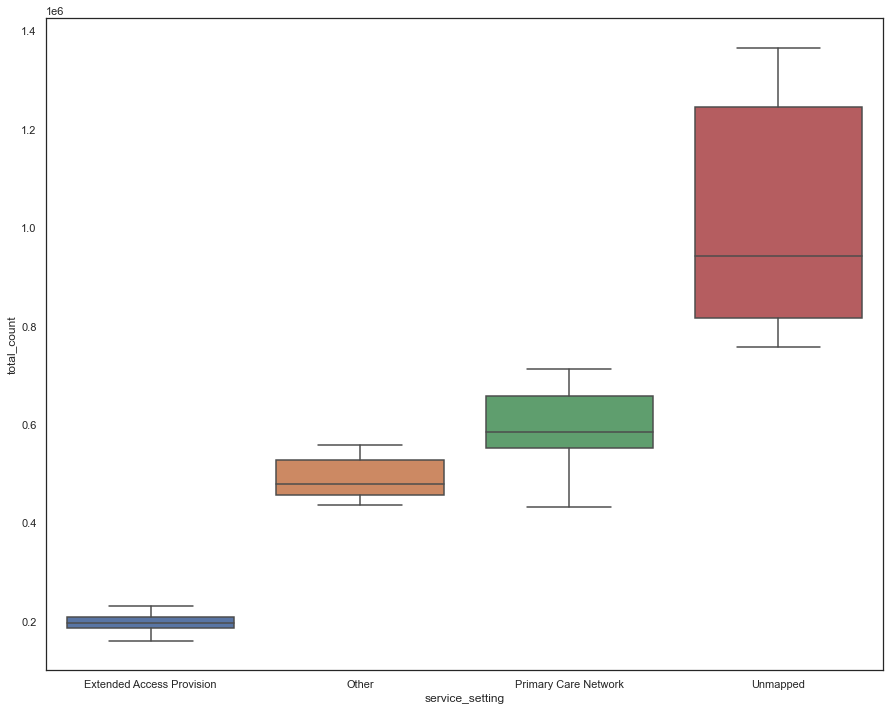

In [83]:
# Create a boxplot to investigate the service settings without GP.
sns.boxplot(x = 'service_setting', y = 'total_count',
             data = nc_ss[nc_ss['service_setting'].isin(['Unmapped', 'Primary Care Network', 'Other', 'Extended Access Provision'])])

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.